In [1]:
"""Based heavily on Software Carpentary tutorial:
https://github.com/story645/ccny_software_carpentary/blob/master/afternoon_session.ipynb
"""
import pandas as pd
#check which version of pandas is being used
pd.__version__

'0.16.2'

In [2]:
"""load in Monthly Global Historical Climatology 
Network(GHCN) Data for New York City
"""
ghcn = pd.read_csv("data/nyc_2005_2015.csv")

In [3]:
ghcn

,STATION_NAME,DATE,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
0,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20050601,152,0,528,0,350,117,260,173,217
1,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20050701,439,0,1324,0,333,161,283,205,244
2,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20050801,104,0,148,0,356,178,300,215,257
3,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20050901,429,0,548,0,322,100,270,175,223
4,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20051001,1184,0,3803,0,244,33,177,108,142
5,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20051101,241,0,1030,0,200,-56,134,48,91
6,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20051201,234,76,947,127,128,-94,48,-17,15
7,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20060101,257,51,1107,53,167,-100,81,-2,40
8,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20060201,264,432,564,427,161,-94,54,-26,14
9,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20060301,157,25,310,13,217,-56,96,12,54


In [4]:
#view the first 5 rows of the data
ghcn.head()

,STATION_NAME,DATE,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
0,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20050601,152,0,528,0,350,117,260,173,217
1,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20050701,439,0,1324,0,333,161,283,205,244
2,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20050801,104,0,148,0,356,178,300,215,257
3,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20050901,429,0,548,0,322,100,270,175,223
4,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20051001,1184,0,3803,0,244,33,177,108,142


In [5]:
#view last 5
ghcn.tail()

,STATION_NAME,DATE,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
1620,WANTAGH CEDAR CREEK NY US,20110801,2443,-9999,4042,-9999,361,144,292,204,248
1621,WANTAGH CEDAR CREEK NY US,20110901,338,-9999,942,-9999,322,83,253,177,215
1622,WANTAGH CEDAR CREEK NY US,20111001,455,-9999,1023,-9999,322,0,193,102,148
1623,WANTAGH CEDAR CREEK NY US,20111101,274,-9999,751,-9999,228,0,155,67,111
1624,WANTAGH CEDAR CREEK NY US,20111201,279,-9999,761,-9999,167,-61,107,22,64


In [6]:
#can specifiy
ghcn.head(3)

,STATION_NAME,DATE,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
0,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20050601,152,0,528,0,350,117,260,173,217
1,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20050701,439,0,1324,0,333,161,283,205,244
2,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20050801,104,0,148,0,356,178,300,215,257


In [7]:
"""pandas uses numpy as its underlying structure
and so has numpy attributes like shape"""
ghcn.shape

(1625, 11)

In [8]:
#get a columnwise summary of the data
ghcn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 0 to 1624
Data columns (total 11 columns):
STATION_NAME    1625 non-null object
DATE            1625 non-null int64
EMXP            1625 non-null int64
MXSD            1625 non-null int64
TPCP            1625 non-null int64
TSNW            1625 non-null int64
EMXT            1625 non-null int64
EMNT            1625 non-null int64
MMXT            1625 non-null int64
MMNT            1625 non-null int64
MNTM            1625 non-null int64
dtypes: int64(10), object(1)
memory usage: 152.3+ KB


In [9]:
#just the datatype of each column
ghcn.dtypes

STATION_NAME    object
DATE             int64
EMXP             int64
MXSD             int64
TPCP             int64
TSNW             int64
EMXT             int64
EMNT             int64
MMXT             int64
MMNT             int64
MNTM             int64
dtype: object

In [10]:
#restrict to first entries of just one column
ghcn['STATION_NAME'].head(4)

0    NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US
1    NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US
2    NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US
3    NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US
Name: STATION_NAME, dtype: object

In [11]:
#can also use dot notation
ghcn.STATION_NAME.head(4)

0    NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US
1    NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US
2    NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US
3    NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US
Name: STATION_NAME, dtype: object

Indexing
====

In [12]:
#multiple columns?
ghcn['TSNW', 'MNTM']

KeyError: ('TSNW', 'MNTM')

In [13]:
#Instead list of columns
ghcn[['TSNW','MNTM']].head()

,TSNW,MNTM
0,0,217
1,0,244
2,0,257
3,0,223
4,0,142


In [14]:
#order dictates display
ghcn[['MNTM','TSNW']].head()

,MNTM,TSNW
0,217,0
1,244,0
2,257,0
3,223,0
4,142,0


In [15]:
#supports numpy slicing
ghcn[['MNTM','TSNW']][5:15:2]

,MNTM,TSNW
5,91,0
7,40,53
9,54,13
11,162,0
13,249,0


In [16]:
#COPY IS EXPLICIT
ghcn2 = ghcn.copy()

In [17]:
ghcn2['MNTM'][:3]=-9088

C:\Users\story645\AppData\Roaming\Python\Python27\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [18]:
ghcn['MNTM'][:3]

0    217
1    244
2    257
Name: MNTM, dtype: int64

In [19]:
ghcn2['MNTM'][:3]

0   -9088
1   -9088
2   -9088
Name: MNTM, dtype: int64

In [20]:
#assignment isn't copy
ghcn3 = ghcn2
ghcn3['MNTM'][:3]="NOT A COPY"
print ghcn2['MNTM'][:3]

0    NOT A COPY
1    NOT A COPY
2    NOT A COPY
Name: MNTM, dtype: object


C:\Users\story645\AppData\Roaming\Python\Python27\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


use whos to see which variables are currently in the workspace

must be in its own cell (not pandas specific)

In [21]:
whos

Variable   Type         Data/Info
---------------------------------
ghcn       DataFrame                             <...>n[1625 rows x 11 columns]
ghcn2      DataFrame                             <...>n[1625 rows x 11 columns]
ghcn3      DataFrame                             <...>n[1625 rows x 11 columns]
pd         module       <module 'pandas' from 'C:<...>ges\pandas\__init__.pyc'>


In [22]:
"""use index based selections->
under the hood it's more efficient
doesn't copy the data for the subset
is a view on the data"""
ghcn.loc[5:15:2, ['MNTM', 'TSWN']]

,MNTM,TSWN
5,91,NaN
7,40,NaN
9,54,NaN
11,162,NaN
13,249,NaN
15,194,NaN


In [23]:
#can also be used for columns
ghcn.loc[5:15:2,'TSNW':'MNTM']

,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
5,0,200,-56,134,48,91
7,53,167,-100,81,-2,40
9,13,217,-56,96,12,54
11,0,289,72,207,117,162
13,0,350,167,289,209,249
15,0,278,94,233,156,194


In [24]:
#view column names
ghcn.columns

Index([u'STATION_NAME', u'DATE', u'EMXP', u'MXSD', u'TPCP', u'TSNW', u'EMXT',
       u'EMNT', u'MMXT', u'MMNT', u'MNTM'],
      dtype='object')

In [25]:
#pure numerical indexing (rows, cols)
ghcn.iloc[5:15:2, 4:7]

,TPCP,TSNW,EMXT
5,1030,0,200
7,1107,53,167
9,310,13,217
11,1090,0,289
13,1286,0,350


In [26]:
# use np.r_ to build non sequential slice objects
import numpy as np
ghcn.iloc[np.r_[0,30:36:2,70],4:7]

,TPCP,TSNW,EMXT
0,528,0,350
30,1115,61,128
32,1194,226,194
34,699,0,261
70,205,0,-9999


Summary Statistics
==========

In [27]:
#get counts of each max snowfall
ghcn['TSNW'].value_counts()

 0       972
-9999    305
 5        13
 13       10
 33        6
 3         6
 15        6
 38        6
 25        6
 41        5
 10        5
 18        5
 64        5
 102       5
 30        4
 74        4
 140       4
 53        4
 56        4
 8         4
 44        4
 84        3
 79        3
 259       3
 163       3
 96        3
 193       3
 104       3
 132       3
 61        3
        ... 
 186       1
 270       1
 400       1
 110       1
 112       1
 419       1
 417       1
 122       1
 124       1
 415       1
 126       1
 129       1
 130       1
 402       1
 139       1
 142       1
 185       1
 143       1
 380       1
 155       1
 156       1
 157       1
 160       1
 162       1
 369       1
 361       1
 168       1
 175       1
 179       1
 189       1
dtype: int64

In [28]:
#get more summary statistics
print ghcn['TSNW'].min()
print ghcn['TSNW'].mean()
print ghcn['TSNW'].max()

-9999
-1833.05784615
1023


In [29]:
#mask missing values (this is numpy functionality)
ghcn[ghcn==-9999]=np.nan

In [30]:
print ghcn['TSNW'].min()
print ghcn['TSNW'].mean()
print ghcn['TSNW'].max()

0.0
53.7696969697
1023.0


In [31]:
#get all the summary stats
ghcn['TSNW'].describe()

count    1320.000000
mean       53.769697
std       151.237483
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max      1023.000000
Name: TSNW, dtype: float64

In [32]:
#summary for entire dataset
ghcn.describe()

,DATE,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
count,1625.000000,1622.000000,987.000000,1622.000000,1320.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000
mean,20099030.169231,370.113440,49.962513,977.469174,53.769697,255.468858,16.496540,169.991349,84.250865,127.134948
std,26540.336173,270.251403,108.166236,665.199628,151.237483,82.013978,96.101295,90.428972,84.560433,87.190188
min,20050601.000000,0.000000,0.000000,0.000000,0.000000,44.000000,-182.000000,-7.000000,-83.000000,-44.000000
25%,20080401.000000,208.000000,0.000000,553.000000,0.000000,189.000000,-71.000000,87.750000,4.750000,47.000000
50%,20100401.000000,305.000000,0.000000,880.500000,0.000000,269.500000,17.000000,176.000000,82.000000,128.000000
75%,20120701.000000,460.000000,45.500000,1250.000000,5.000000,323.500000,100.000000,255.000000,165.000000,210.250000
max,20141201.000000,2443.000000,584.000000,4813.000000,1023.000000,539.000000,200.000000,336.000000,239.000000,282.000000


In [33]:
#include string values 
ghcn.describe(include='all')

,STATION_NAME,DATE,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
count,1625,1625.000000,1622.000000,987.000000,1622.000000,1320.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000
unique,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,FARMINGDALE REPUBLIC AIRPORT NY US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,20099030.169231,370.113440,49.962513,977.469174,53.769697,255.468858,16.496540,169.991349,84.250865,127.134948
std,NaN,26540.336173,270.251403,108.166236,665.199628,151.237483,82.013978,96.101295,90.428972,84.560433,87.190188
min,NaN,20050601.000000,0.000000,0.000000,0.000000,0.000000,44.000000,-182.000000,-7.000000,-83.000000,-44.000000
25%,NaN,20080401.000000,208.000000,0.000000,553.000000,0.000000,189.000000,-71.000000,87.750000,4.750000,47.000000
50%,NaN,20100401.000000,305.000000,0.000000,880.500000,0.000000,269.500000,17.000000,176.000000,82.000000,128.000000
75%,NaN,20120701.000000,460.000000,45.500000,1250.000000,5.000000,323.500000,100.000000,255.000000,165.000000,210.250000


In [34]:
#restrict by type
ghcn.describe(include=['object'])

,STATION_NAME
count,1625
unique,28
top,FARMINGDALE REPUBLIC AIRPORT NY US
freq,121


Fixing dates
=======

In [35]:
ghcn['DATE'].head()

0    20050601
1    20050701
2    20050801
3    20050901
4    20051001
Name: DATE, dtype: int64

In [36]:
#use Python datetime strptime
from datetime import datetime 
"""the apply method applies the function 
that's passed inas an argument to every 
element in the column it's applied to
"""
def ds2dt(x):
    return datetime.strptime(str(x),'%Y%m%d')

parsed_date = ghcn['DATE'].apply(ds2dt)

In [37]:
print parsed_date[:5]

0   2005-06-01
1   2005-07-01
2   2005-08-01
3   2005-09-01
4   2005-10-01
Name: DATE, dtype: datetime64[ns]


In [38]:
ghcn['DATE'] = parsed_date

In [39]:
ghcn['DATE'].head()

0   2005-06-01
1   2005-07-01
2   2005-08-01
3   2005-09-01
4   2005-10-01
Name: DATE, dtype: datetime64[ns]

In [40]:
ghcn.describe()

,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
count,1622.000000,987.000000,1622.000000,1320.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000
mean,370.113440,49.962513,977.469174,53.769697,255.468858,16.496540,169.991349,84.250865,127.134948
std,270.251403,108.166236,665.199628,151.237483,82.013978,96.101295,90.428972,84.560433,87.190188
min,0.000000,0.000000,0.000000,0.000000,44.000000,-182.000000,-7.000000,-83.000000,-44.000000
25%,208.000000,0.000000,553.000000,0.000000,189.000000,-71.000000,87.750000,4.750000,47.000000
50%,305.000000,0.000000,880.500000,0.000000,269.500000,17.000000,176.000000,82.000000,128.000000
75%,460.000000,45.500000,1250.000000,5.000000,323.500000,100.000000,255.000000,165.000000,210.250000
max,2443.000000,584.000000,4813.000000,1023.000000,539.000000,200.000000,336.000000,239.000000,282.000000


In [41]:
ghcn.describe(include=['datetime'])

,DATE
count,1625
unique,115
top,2010-01-01 00:00:00
freq,30
first,2005-06-01 00:00:00
last,2014-12-01 00:00:00


Filtering
=====

In [42]:
#boolean/conditional
ghcn[ghcn['TSNW']>400]

,STATION_NAME,DATE,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
8,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,2006-02-01,264,432,564,427,161,-94,54,-26,14
54,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,2009-12-01,384,356,1587,412,189,-89,59,-12,23
56,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,2010-02-01,404,254,1529,754,83,-89,33,-21,6
80,NEW YORK LAGUARDIA AIRPORT NY US,2006-02-01,404,406,734,645,172,-83,62,-9,26
128,NEW YORK LAGUARDIA AIRPORT NY US,2010-02-01,378,254,1275,739,78,-78,34,-15,10
224,NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US,2006-02-01,422,432,731,683,167,-94,58,-16,21
272,NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US,2010-02-01,508,533,1701,937,78,-83,33,-20,6
350,CENTERPORT NY US,2010-02-01,673,279,1689,676,78,-100,23,-36,-6
371,LEVITTOWN 0.2 E NY US,2010-02-01,960,356,1255,610,NaN,NaN,NaN,NaN,NaN
398,FLORAL PARK 0.4 W NY US,2010-02-01,1210,384,3356,963,NaN,NaN,NaN,NaN,NaN


In [43]:
#compound boolean
ghcn[(ghcn['TSNW']>400) & (ghcn['MNTM']<0)]

,STATION_NAME,DATE,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
350,CENTERPORT NY US,2010-02-01,673,279,1689,676,78,-100,23,-36,-6
850,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,2011-01-01,325,305,904,561,94,-144,16,-48,-16
886,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,2014-01-01,183,180,765,433,122,-160,23,-60,-18
887,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,2014-02-01,323,250,1167,535,128,-116,30,-39,-4
934,NEW YORK LAGUARDIA AIRPORT NY US,2011-01-01,284,457,1003,828,117,-128,26,-27,-1
970,NEW YORK LAGUARDIA AIRPORT NY US,2014-01-01,127,200,601,425,133,-155,20,-55,-18
971,NEW YORK LAGUARDIA AIRPORT NY US,2014-02-01,427,330,1253,706,128,-121,30,-36,-3
1111,NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US,2011-01-01,328,584,1255,913,117,-144,15,-41,-13
1147,NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US,2014-01-01,127,280,710,500,144,-155,19,-56,-18
1148,NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US,2014-02-01,452,460,1392,736,133,-127,31,-34,-2


In [44]:
#string based boolean mask
ghcn['STATION_NAME'].str.match('CENTERPORT NY US') # boolean mask

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1595    False
1596    False
1597    False
1598    False
1599    False
1600    False
1601    False
1602    False
1603    False
1604    False
1605    False
1606    False
1607    False
1608    False
1609    False
1610    False
1611    False
1612    False
1613    False
1614    False
1615    False
1616    False
1617    False
1618    False
1619    False
1620    False
1621    False
1622    False
1623    False
1624    False
Name: STATION_NAME, dtype: bool

In [45]:
#pull out data using mask
mask = ghcn['STATION_NAME'].str.match('CENTERPORT NY US')
ghcn[mask]

,STATION_NAME,DATE,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
294,CENTERPORT NY US,2005-06-01,122,0,463,0,328,111,267,171,219
295,CENTERPORT NY US,2005-07-01,472,0,1300,0,339,150,279,194,236
296,CENTERPORT NY US,2005-08-01,173,0,337,0,350,161,288,205,246
297,CENTERPORT NY US,2005-09-01,704,0,867,0,311,78,255,168,212
298,CENTERPORT NY US,2005-10-01,1090,0,3067,0,233,33,165,105,135
299,CENTERPORT NY US,2005-11-01,287,0,1046,20,217,-61,131,45,88
300,CENTERPORT NY US,2005-12-01,269,25,1016,132,122,-94,41,-21,10
301,CENTERPORT NY US,2006-01-01,368,76,1420,64,161,-111,73,-5,34
302,CENTERPORT NY US,2006-02-01,221,305,611,340,156,-100,51,-31,10
303,CENTERPORT NY US,2006-03-01,150,51,294,56,222,-67,93,3,48


In [46]:
#list of stations
ghcn['STATION_NAME'].unique()

array(['NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US',
       'WHITE PLAINS 3.1 NNW NY US', 'HARRISON 4.1 SSW NY US',
       'NEW YORK LAGUARDIA AIRPORT NY US',
       'FARMINGDALE REPUBLIC AIRPORT NY US',
       'CHESTNUT RIDGE 0.3 SSW NY US', 'NANUET 0.3 E NY US',
       'SPRING VALLEY 1.7 N NY US',
       'NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US',
       'BETHPAGE 0.9 NNW NY US', 'CENTERPORT NY US',
       'LEVITTOWN 0.2 E NY US', 'MILL NECK 1.1 SW NY US',
       'FLORAL PARK 0.4 W NY US', 'WESTCHESTER CO AIRPORT NY US',
       'NEW YORK NY US', 'OCEANSIDE NY US', 'STATEN ISLAND 4.5 SSE NY US',
       'BROOKLYN 2.4 SW NY US', 'DOBBS FERRY ARDSLEY NY US',
       'MINEOLA NY US', 'BRONX NY US', 'WANTAGH CEDAR CREEK NY US',
       'NEW ROCHELLE 1.3 S NY US', 'WEST NYACK 1.3 WSW NY US',
       'MIDDLE VILLAGE 0.5 SW NY US', 'STATEN ISLAND 1.4 SE NY US',
       'BROOKLYN 3.1 NW NY US'], dtype=object)

In [47]:
#any station in list
stations = ['MIDDLE VILLAGE 0.5 SW NY US',
            'STATEN ISLAND 4.5 SSE NY US' ]
ghcn[ghcn['STATION_NAME'].isin(stations)]

,STATION_NAME,DATE,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
543,STATEN ISLAND 4.5 SSE NY US,2009-07-01,234,NaN,886,0,NaN,NaN,NaN,NaN,NaN
544,STATEN ISLAND 4.5 SSE NY US,2009-08-01,165,NaN,381,0,NaN,NaN,NaN,NaN,NaN
545,STATEN ISLAND 4.5 SSE NY US,2009-09-01,91,NaN,136,0,NaN,NaN,NaN,NaN,NaN
546,STATEN ISLAND 4.5 SSE NY US,2009-10-01,203,NaN,213,0,NaN,NaN,NaN,NaN,NaN
547,STATEN ISLAND 4.5 SSE NY US,2009-11-01,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN
548,STATEN ISLAND 4.5 SSE NY US,2009-12-01,185,NaN,185,0,NaN,NaN,NaN,NaN,NaN
549,STATEN ISLAND 4.5 SSE NY US,2010-01-01,318,NaN,318,0,NaN,NaN,NaN,NaN,NaN
550,STATEN ISLAND 4.5 SSE NY US,2010-03-01,300,NaN,938,0,NaN,NaN,NaN,NaN,NaN
551,STATEN ISLAND 4.5 SSE NY US,2010-04-01,97,NaN,97,0,NaN,NaN,NaN,NaN,NaN
552,STATEN ISLAND 4.5 SSE NY US,2010-05-01,114,NaN,233,0,NaN,NaN,NaN,NaN,NaN


In [48]:
#anything near an airport
ghcn[ghcn['STATION_NAME'].str.contains("AIRPORT")]

,STATION_NAME,DATE,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
0,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,2005-06-01,152,0,528,0,350,117,260,173,217
1,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,2005-07-01,439,0,1324,0,333,161,283,205,244
2,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,2005-08-01,104,0,148,0,356,178,300,215,257
3,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,2005-09-01,429,0,548,0,322,100,270,175,223
4,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,2005-10-01,1184,0,3803,0,244,33,177,108,142
5,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,2005-11-01,241,0,1030,0,200,-56,134,48,91
6,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,2005-12-01,234,76,947,127,128,-94,48,-17,15
7,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,2006-01-01,257,51,1107,53,167,-100,81,-2,40
8,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,2006-02-01,264,432,564,427,161,-94,54,-26,14
9,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,2006-03-01,157,25,310,13,217,-56,96,12,54


Sorting
====

In [49]:
ghcn['TSNW'].order()

0        0
915      0
916      0
917      0
918      0
919      0
920      0
921      0
924      0
925      0
926      0
927      0
928      0
929      0
930      0
931      0
932      0
937      0
953      0
952      0
951      0
950      0
949      0
948      0
914      0
947      0
944      0
942      0
941      0
940      0
        ..
1408   NaN
1409   NaN
1410   NaN
1411   NaN
1467   NaN
1531   NaN
1532   NaN
1533   NaN
1534   NaN
1537   NaN
1538   NaN
1539   NaN
1540   NaN
1556   NaN
1557   NaN
1558   NaN
1559   NaN
1560   NaN
1561   NaN
1562   NaN
1599   NaN
1600   NaN
1601   NaN
1618   NaN
1619   NaN
1620   NaN
1621   NaN
1622   NaN
1623   NaN
1624   NaN
Name: TSNW, dtype: float64

In [50]:
#sort by columns
ghcn.sort_index(by=['TSNW', 'EMXP']).head()

,STATION_NAME,DATE,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
61,WHITE PLAINS 3.1 NNW NY US,2008-01-01,0,0,0,0,NaN,NaN,NaN,NaN,NaN
62,WHITE PLAINS 3.1 NNW NY US,2008-08-01,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN
64,WHITE PLAINS 3.1 NNW NY US,2009-09-01,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN
65,WHITE PLAINS 3.1 NNW NY US,2009-12-01,0,152,0,0,NaN,NaN,NaN,NaN,NaN
202,CHESTNUT RIDGE 0.3 SSW NY US,2008-08-01,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN


Grouping
=====

In [51]:
#order the data by Station
by_station = ghcn.groupby("STATION_NAME")

In [52]:
by_station

In [53]:
by_station.count() #how many of each record

,DATE,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
STATION_NAME,,,,,,,,,,
BETHPAGE 0.9 NNW NY US,17,17,9,17,17,0,0,0,0,0
BRONX NY US,101,101,98,101,97,101,101,101,101,101
BROOKLYN 2.4 SW NY US,7,7,4,7,7,0,0,0,0,0
BROOKLYN 3.1 NW NY US,14,14,5,14,14,0,0,0,0,0
CENTERPORT NY US,121,121,120,121,120,121,121,121,121,121
CHESTNUT RIDGE 0.3 SSW NY US,9,9,3,9,9,0,0,0,0,0
DOBBS FERRY ARDSLEY NY US,83,83,75,83,75,83,83,83,83,83
FARMINGDALE REPUBLIC AIRPORT NY US,121,121,0,121,0,121,121,121,121,121
FLORAL PARK 0.4 W NY US,81,81,25,81,81,0,0,0,0,0


In [54]:
by_station.size()

STATION_NAME
BETHPAGE 0.9 NNW NY US                               17
BRONX NY US                                         101
BROOKLYN 2.4 SW NY US                                 7
BROOKLYN 3.1 NW NY US                                14
CENTERPORT NY US                                    121
CHESTNUT RIDGE 0.3 SSW NY US                          9
DOBBS FERRY ARDSLEY NY US                            83
FARMINGDALE REPUBLIC AIRPORT NY US                  121
FLORAL PARK 0.4 W NY US                              81
HARRISON 4.1 SSW NY US                                6
LEVITTOWN 0.2 E NY US                                54
MIDDLE VILLAGE 0.5 SW NY US                          39
MILL NECK 1.1 SW NY US                                7
MINEOLA NY US                                        83
NANUET 0.3 E NY US                                   13
NEW ROCHELLE 1.3 S NY US                             35
NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US     121
NEW YORK J F KENNEDY INTERNATIONAL 

In [55]:
#how much total snow in each station?
by_station['TSNW'].sum()

STATION_NAME
BETHPAGE 0.9 NNW NY US                               253
BRONX NY US                                         6646
BROOKLYN 2.4 SW NY US                                476
BROOKLYN 3.1 NW NY US                                714
CENTERPORT NY US                                    7441
CHESTNUT RIDGE 0.3 SSW NY US                         224
DOBBS FERRY ARDSLEY NY US                           5835
FARMINGDALE REPUBLIC AIRPORT NY US                   NaN
FLORAL PARK 0.4 W NY US                             5608
HARRISON 4.1 SSW NY US                               163
LEVITTOWN 0.2 E NY US                               2599
MIDDLE VILLAGE 0.5 SW NY US                         2715
MILL NECK 1.1 SW NY US                                 0
MINEOLA NY US                                       4464
NANUET 0.3 E NY US                                    30
NEW ROCHELLE 1.3 S NY US                            1532
NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US     8541
NEW YORK J F KENNE

In [56]:
#average temperature
by_station['MNTM'].mean()

STATION_NAME
BETHPAGE 0.9 NNW NY US                                     NaN
BRONX NY US                                         136.049505
BROOKLYN 2.4 SW NY US                                      NaN
BROOKLYN 3.1 NW NY US                                      NaN
CENTERPORT NY US                                    120.669421
CHESTNUT RIDGE 0.3 SSW NY US                               NaN
DOBBS FERRY ARDSLEY NY US                           118.746988
FARMINGDALE REPUBLIC AIRPORT NY US                  122.371901
FLORAL PARK 0.4 W NY US                                    NaN
HARRISON 4.1 SSW NY US                                     NaN
LEVITTOWN 0.2 E NY US                                      NaN
MIDDLE VILLAGE 0.5 SW NY US                                NaN
MILL NECK 1.1 SW NY US                                     NaN
MINEOLA NY US                                       131.060241
NANUET 0.3 E NY US                                         NaN
NEW ROCHELLE 1.3 S NY US                  

In [57]:
#can also do summary
by_station['TSNW'].describe()

STATION_NAME                       
BETHPAGE 0.9 NNW NY US        count     17.000000
                              mean      14.882353
                              std       33.631983
                              min        0.000000
                              25%        0.000000
                              50%        0.000000
                              75%        5.000000
                              max      126.000000
BRONX NY US                   count     97.000000
                              mean      68.515464
                              std      164.535781
                              min        0.000000
                              25%        0.000000
                              50%        0.000000
                              75%       55.000000
                              max      911.000000
BROOKLYN 2.4 SW NY US         count      7.000000
                              mean      68.000000
                              std      104.850687
              

In [58]:
#and make it more readable using unstack
by_station['TSNW'].describe().unstack()

,count,mean,std,min,25%,50%,75%,max
STATION_NAME,,,,,,,,
BETHPAGE 0.9 NNW NY US,17,14.882353,33.631983,0,0,0,5.00,126
BRONX NY US,97,68.515464,164.535781,0,0,0,55.00,911
BROOKLYN 2.4 SW NY US,7,68.000000,104.850687,0,0,0,98.00,280
BROOKLYN 3.1 NW NY US,14,51.000000,128.667730,0,0,0,12.25,457
CENTERPORT NY US,120,62.008333,169.491702,0,0,0,20.00,1023
CHESTNUT RIDGE 0.3 SSW NY US,9,24.888889,55.582021,0,0,0,0.00,163
DOBBS FERRY ARDSLEY NY US,75,77.800000,181.301004,0,0,0,75.50,884
FARMINGDALE REPUBLIC AIRPORT NY US,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLORAL PARK 0.4 W NY US,81,69.234568,190.468257,0,0,0,0.00,963


In [59]:
#can subclass groups
groups = ['DATE', 'STATION_NAME']
ghcn.groupby(groups)['TSNW'].sum().unstack()

C:\Users\story645\Anaconda\lib\site-packages\pandas\core\index.py:4072: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


STATION_NAME,BETHPAGE 0.9 NNW NY US,BRONX NY US,BROOKLYN 2.4 SW NY US,BROOKLYN 3.1 NW NY US,CENTERPORT NY US,CHESTNUT RIDGE 0.3 SSW NY US,DOBBS FERRY ARDSLEY NY US,FARMINGDALE REPUBLIC AIRPORT NY US,FLORAL PARK 0.4 W NY US,HARRISON 4.1 SSW NY US,...,NEW YORK LAGUARDIA AIRPORT NY US,NEW YORK NY US,OCEANSIDE NY US,SPRING VALLEY 1.7 N NY US,STATEN ISLAND 1.4 SE NY US,STATEN ISLAND 4.5 SSE NY US,WANTAGH CEDAR CREEK NY US,WEST NYACK 1.3 WSW NY US,WESTCHESTER CO AIRPORT NY US,WHITE PLAINS 3.1 NNW NY US
DATE,,,,,,,,,,,,,,,,,,,,,
2005-06-01,NaN,0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,...,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN
2005-07-01,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN
2005-08-01,NaN,0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,...,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN
2005-09-01,NaN,0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,...,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN
2005-10-01,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,...,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN
2005-11-01,NaN,0,NaN,NaN,20,NaN,0,NaN,NaN,NaN,...,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN
2005-12-01,NaN,246,NaN,NaN,132,NaN,246,NaN,NaN,NaN,...,188,132,227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-01,NaN,18,NaN,NaN,64,NaN,58,NaN,NaN,NaN,...,74,41,84,NaN,NaN,NaN,0,NaN,NaN,NaN
2006-02-01,NaN,519,NaN,NaN,340,NaN,356,NaN,NaN,NaN,...,645,417,339,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
"""aggregate by month:
.map(lambda x)pulls out the months 
of the date column"""
months = ghcn['DATE'].map(lambda x: x.month)
ghcn.groupby(months).mean()

,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
DATE,,,,,,,,,
1,292.074627,94.803922,725.514925,151.365217,145.131313,-120.474747,43.161616,-30.040404,6.606061
2,314.244275,213.850000,826.839695,307.750000,139.163265,-100.102041,48.928571,-28.959184,9.908163
3,404.686567,78.089888,1099.194030,44.754545,217.677083,-63.406250,103.562500,14.114583,58.854167
4,461.007812,0.000000,1013.625000,0.959596,285.626374,6.384615,165.582418,64.659341,115.230769
5,355.917910,0.000000,964.119403,0.000000,310.515789,54.273684,217.936842,118.547368,168.252632
6,396.108108,0.000000,1132.310811,0.000000,335.271028,108.570093,265.261682,171.644860,218.504673
7,338.129771,0.000000,944.732824,0.000000,351.774194,153.838710,293.000000,202.763441,247.903226
8,458.129496,0.000000,1085.510791,0.000000,340.072917,144.229167,283.270833,194.885417,239.093750
9,345.022556,0.000000,828.766917,0.000000,312.357895,93.463158,246.315789,158.452632,202.326316


In [61]:
#combine date and station
new_groups = ['STATION_NAME', months]
ghcn.groupby(new_groups)['TSNW'].sum().unstack()

DATE,1,2,3,4,5,6,7,8,9,10,11,12
STATION_NAME,,,,,,,,,,,,
BETHPAGE 0.9 NNW NY US,61,15,0,0,0,0,0,0,0,0,0,177
BRONX NY US,1506,3190,384,0,0,0,0,0,0,84,125,1357
BROOKLYN 2.4 SW NY US,117,79,280,0,0,NaN,NaN,NaN,NaN,NaN,0,0
BROOKLYN 3.1 NW NY US,204,457,10,0,0,0,0,0,0,0,0,43
CENTERPORT NY US,2074,3431,433,25,0,0,0,0,0,0,40,1438
CHESTNUT RIDGE 0.3 SSW NY US,0,163,0,0,0,0,0,0,NaN,NaN,NaN,61
DOBBS FERRY ARDSLEY NY US,1723,2740,382,0,0,0,0,0,0,0,0,990
FARMINGDALE REPUBLIC AIRPORT NY US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLORAL PARK 0.4 W NY US,1095,3082,270,0,0,0,0,0,0,0,206,955


In [62]:
snow = ghcn.groupby(new_groups)['TSNW'].sum().unstack()
print snow.shape

(28, 12)


In [63]:
#flip for graphing 
snow_graph = snow.T
print snow_graph.shape

(12, 28)


C:\Users\story645\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


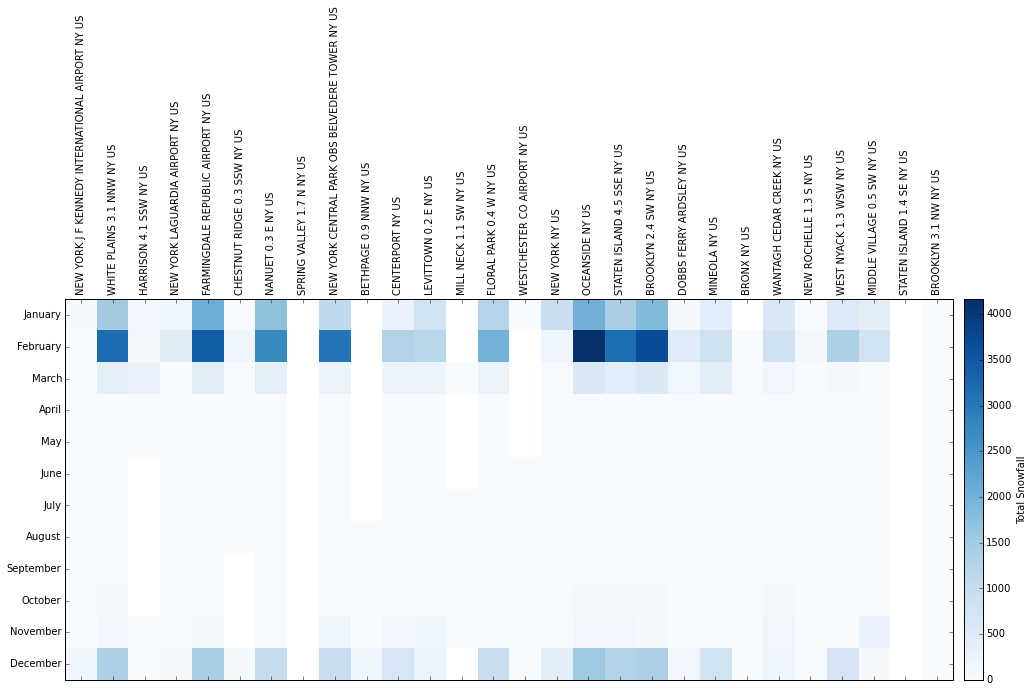

In [64]:
%matplotlib inline

import matplotlib.pyplot as plt
import calendar
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(2,1,1)

im = ax.matshow(snow_graph, cmap='Blues')

station_names = ghcn['STATION_NAME'].unique()
ax.set_xticks(range(len(station_names)))
ax.set_xticklabels(station_names, rotation=90)
ax.set_yticks(np.arange(0,12))
ax.set_yticklabels(calendar.month_name[1:])
cb = fig.colorbar(im, ax=ax,pad=.01, fraction=.020)
cb.set_label("Total Snowfall")

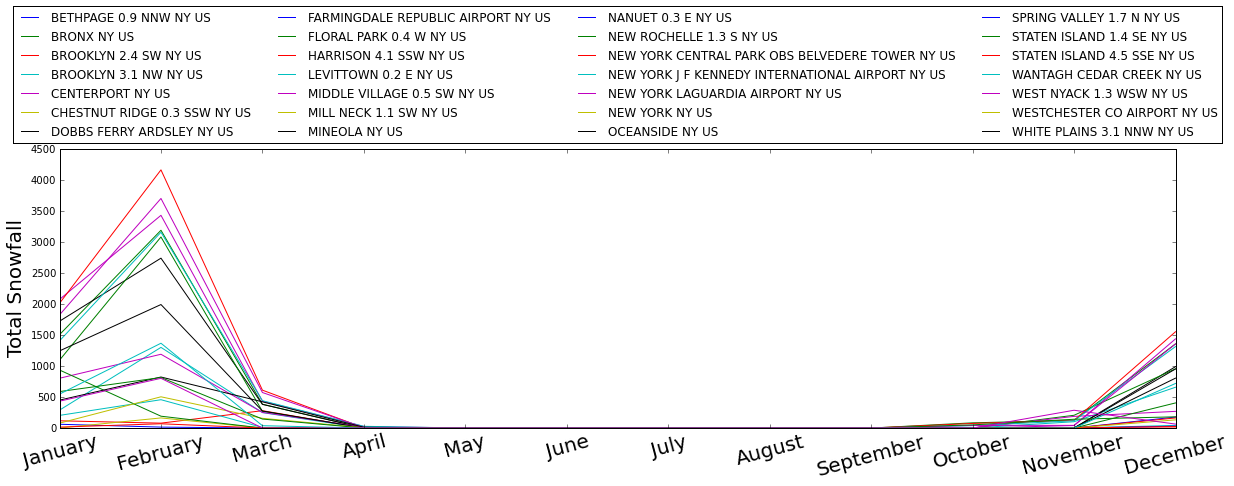

In [65]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

for s in snow_graph:
    ax.plot(snow_graph[s].index,
            snow_graph[s].values, '-',label=s)
    
ax.legend(bbox_to_anchor=(0.5, 1.), 
          loc=8, ncol=4)
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(calendar.month_name[1:], 
                   rotation=15, fontsize=20)
ax.set_xlim((1,12))
ax.set_ylabel("Total Snowfall", fontsize=20)

Pivot Table
======

In [66]:
#create a pivot table to do advanced grouping
ghcn_p = ghcn.pivot_table(index=months, 
            columns='STATION_NAME', 
            aggfunc={'TSNW':'sum', 'MNTM':'mean'})

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [67]:
#doesn't like months, so let's add a column
ghcn['MONTH'] = ghcn['DATE'].map(lambda x: x.month)
ghcn[['DATE', 'MONTH']].head()


,DATE,MONTH
0,2005-06-01,6
1,2005-07-01,7
2,2005-08-01,8
3,2005-09-01,9
4,2005-10-01,10


In [68]:
"""index becomes the row agg function is how 
data in each subset->(Station, Date) is analyzed:
* first argument is the column being analyzed
* second is aggregating function:
    * total snow
    * average tmp
"""
#now fancy grouping
ghcn_pivot = ghcn.pivot_table(index='MONTH', 
            columns='STATION_NAME', 
            aggfunc={'TSNW':'sum', 'MNTM':'mean'})

In [69]:
ghcn_pivot

TSNW                                    \
STATION_NAME BETHPAGE 0.9 NNW NY US BRONX NY US BROOKLYN 2.4 SW NY US   
MONTH                                                                   
1                                61        1506                   117   
2                                15        3190                    79   
3                                 0         384                   280   
4                                 0           0                     0   
5                                 0           0                     0   
6                                 0           0                   NaN   
7                                 0           0                   NaN   
8                                 0           0                   NaN   
9                                 0           0                   NaN   
10                                0          84                   NaN   
11                                0         125                     0   
12                              177        1357                     0   

                                                     \
STATION_NAME BROOKLYN 3.1 NW NY US CENTERPORT NY US   
MONTH                                                 
1                              204             2074   
2                              457             3431   
3                               10              433   
4                                0               25   
5                                0                0   
6                                0                0   
7                                0                0   
8                                0                0   
9                                0                0   
10                               0                0   
11                               0               40   
12                              43             1438   

                                                                     \
STATION_NAME CHESTNUT RIDGE 0.3 SSW NY US DOBBS FERRY ARDSLEY NY US   
MONTH                                                                 
1                                       0                      1723   
2                                     163                      2740   
3                                       0                       382   
4                                       0                         0   
5                                       0                         0   
6                                       0                         0   
7                                       0                         0   
8                                       0                         0   
9                                     NaN                         0   
10                                    NaN                         0   
11                                    NaN                         0   
12                                     61                       990   

                                                                         \
STATION_NAME FARMINGDALE REPUBLIC AIRPORT NY US FLORAL PARK 0.4 W NY US   
MONTH                                                                     
1                                           NaN                    1095   
2                                           NaN                    3082   
3                                           NaN                     270   
4                                           NaN                       0   
5                                           NaN                       0   
6                                           NaN                       0   
7                                           NaN                       0   
8                                           NaN                       0   
9                                           NaN                       0   
10                                          NaN                       0   
11                                          NaN                     

Plot table
======

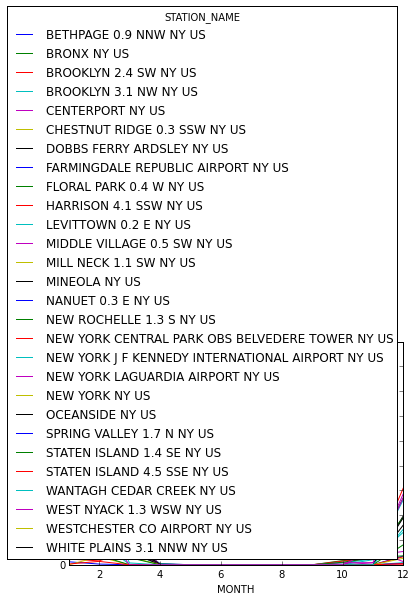

In [70]:
ghcn_pivot['TSNW'].plot()

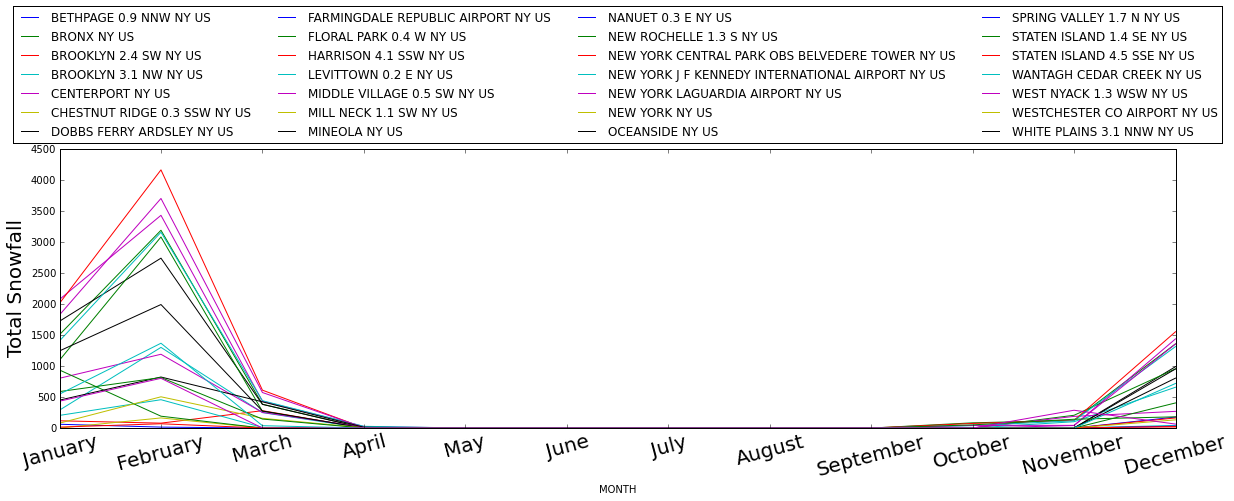

In [71]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

ghcn_pivot['TSNW'].plot(ax=ax)

ax.legend(bbox_to_anchor=(0.5, 1.), 
          loc=8, ncol=4)
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(calendar.month_name[1:], 
                   rotation=15, fontsize=20)
ax.set_xlim((1,12))
ax.set_ylabel("Total Snowfall", fontsize=20)

In [72]:
snow.values

array([[  6.10000000e+01,   1.50000000e+01,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.77000000e+02],
       [  1.50600000e+03,   3.19000000e+03,   3.84000000e+02,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          8.40000000e+01,   1.25000000e+02,   1.35700000e+03],
       [  1.17000000e+02,   7.90000000e+01,   2.80000000e+02,
          0.00000000e+00,   0.00000000e+00,              nan,
                     nan,              nan,              nan,
                     nan,   0.00000000e+00,   0.00000000e+00],
       [  2.04000000e+02,   4.57000000e+02,   1.00000000e+01,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   4.30000000e+01],
    

Correlation


In [73]:
ghcn.corr()

,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM,MONTH
EMXP,1.000000,0.045299,0.818845,0.065864,0.112226,0.102773,0.094833,0.101745,0.098489,0.014256
MXSD,0.045299,1.000000,0.078553,0.876812,-0.518933,-0.496463,-0.528504,-0.519803,-0.526187,-0.270857
TPCP,0.818845,0.078553,1.000000,0.110570,0.079403,0.102248,0.077226,0.101086,0.089053,0.065475
TSNW,0.065864,0.876812,0.110570,1.000000,-0.549729,-0.476868,-0.519350,-0.497323,-0.510599,-0.263258
EMXT,0.112226,-0.518933,0.079403,-0.549729,1.000000,0.871276,0.943890,0.910294,0.930950,0.204670
EMNT,0.102773,-0.496463,0.102248,-0.476868,0.871276,1.000000,0.956555,0.975396,0.969110,0.321026
MMXT,0.094833,-0.528504,0.077226,-0.519350,0.943890,0.956555,1.000000,0.985793,0.996660,0.288159
MMNT,0.101745,-0.519803,0.101086,-0.497323,0.910294,0.975396,0.985793,1.000000,0.996198,0.335141
MNTM,0.098489,-0.526187,0.089053,-0.510599,0.930950,0.969110,0.996660,0.996198,1.000000,0.311866
MONTH,0.014256,-0.270857,0.065475,-0.263258,0.204670,0.321026,0.288159,0.335141,0.311866,1.000000


In [74]:
#exclude month
ghcn_corr = ghcn.loc[:,'EMXP':'MMNT'].corr()
ghcn_corr

,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT
EMXP,1.000000,0.045299,0.818845,0.065864,0.112226,0.102773,0.094833,0.101745
MXSD,0.045299,1.000000,0.078553,0.876812,-0.518933,-0.496463,-0.528504,-0.519803
TPCP,0.818845,0.078553,1.000000,0.110570,0.079403,0.102248,0.077226,0.101086
TSNW,0.065864,0.876812,0.110570,1.000000,-0.549729,-0.476868,-0.519350,-0.497323
EMXT,0.112226,-0.518933,0.079403,-0.549729,1.000000,0.871276,0.943890,0.910294
EMNT,0.102773,-0.496463,0.102248,-0.476868,0.871276,1.000000,0.956555,0.975396
MMXT,0.094833,-0.528504,0.077226,-0.519350,0.943890,0.956555,1.000000,0.985793
MMNT,0.101745,-0.519803,0.101086,-0.497323,0.910294,0.975396,0.985793,1.000000


<matplotlib.colorbar.Colorbar instance at 0x0000000010471488>

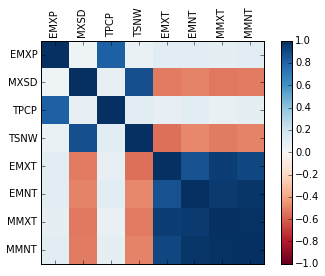

In [75]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

im = ax.matshow(ghcn_corr,
                cmap='RdBu', vmin=-1, vmax=1)
ax.set_xticks(range(ghcn_corr.shape[0]))
ax.set_yticks(range(ghcn_corr.shape[1]))
ax.set_xticklabels(ghcn_corr.columns,rotation=90)
ax.set_yticklabels(ghcn_corr.columns)

fig.colorbar(im, ax=ax)

<matplotlib.colorbar.Colorbar instance at 0x00000000107DCE48>

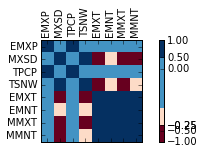

In [76]:
fig = plt.figure()
ax = fig.add_subplot(2,1,1)

import matplotlib.colors as mcolors
import matplotlib.cm as mcm

cmap = mcm.RdBu
norm = mcolors.BoundaryNorm([-1,-.25,-.5,
                             0,-.25, .5, 1], cmap.N)

im = ax.matshow(ghcn_corr,
                cmap=cmap, norm=norm)
ax.set_xticks(range(ghcn_corr.shape[0]))
ax.set_yticks(range(ghcn_corr.shape[1]))
ax.set_xticklabels(ghcn_corr.columns,rotation=90)
ax.set_yticklabels(ghcn_corr.columns)
ax2 = fig.add_subplot(2,1,1)

fig.colorbar(im, ax=ax2)